In [3]:
import cv2, numpy as np, matplotlib.pyplot as plt
def show(img, show=True, **kwargs):
    plt.imshow(img[...,::-1], **kwargs)
    if show:
        plt.show()

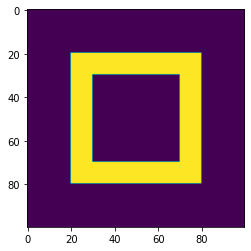

In [4]:
img = np.zeros((100,100),dtype=bool)
img[20:80,20:80] = True
img[30:70,30:70] = False
show(img)

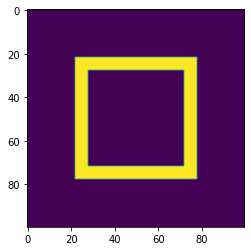

In [5]:
eroded_img = cv2.erode(img.astype(np.uint8), kernel=np.ones((5,5))).astype(bool)
show(eroded_img)

In [6]:
points = np.moveaxis(np.indices(eroded_img.shape), 0, -1)[eroded_img]
points

array([[22, 22],
       [22, 23],
       [22, 24],
       ...,
       [77, 75],
       [77, 76],
       [77, 77]])

In [7]:
img_color = eroded_img.astype(np.uint8)[...,None] * np.array((0,255,255), dtype=np.uint8)
img_color.dtype

dtype('uint8')

In [8]:
from importlib import reload
import drone_control as dc
reload(dc)

<module 'drone_control' from '/home/danealor/Documents/fall2021-project/code/eagle_eye/scripts/drone_control.py'>

In [9]:
dc.find_closest(eroded_img, (40,40))

array([ 13., 485.])

In [10]:
from scipy.spatial import KDTree
pts = np.moveaxis(np.indices(eroded_img.shape), 0, -1)[img]
print(pts[:10])
tree = KDTree(pts)
np.array(tree.query((40, 40)))

[[20 20]
 [20 21]
 [20 22]
 [20 23]
 [20 24]
 [20 25]
 [20 26]
 [20 27]
 [20 28]
 [20 29]]


array([ 11., 809.])